**1. Data Exploration**

In [1]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv("train.csv")
print(train_data.head())
print(train_data.info())
print(train_data.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

**2. Data Cleaning and Preprocessing**

In [2]:
# Handle missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data['Cabin'] = train_data['Cabin'].fillna('Unknown')

# Encode categorical variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

# Create new features
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1


<ipython-input-2-8cb07e1d7a5a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-2-8cb07e1d7a5a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

**3. Exploratory Data Analysis (EDA)**

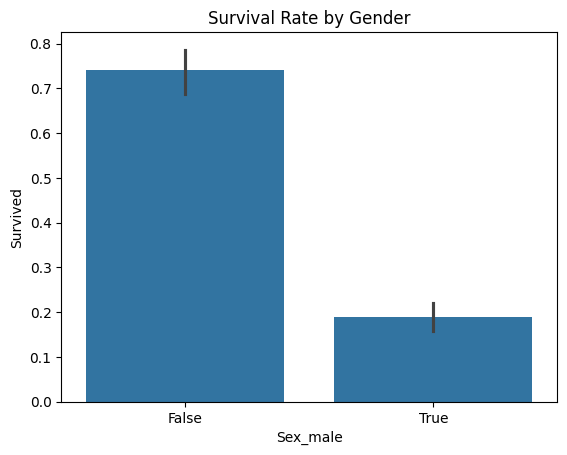

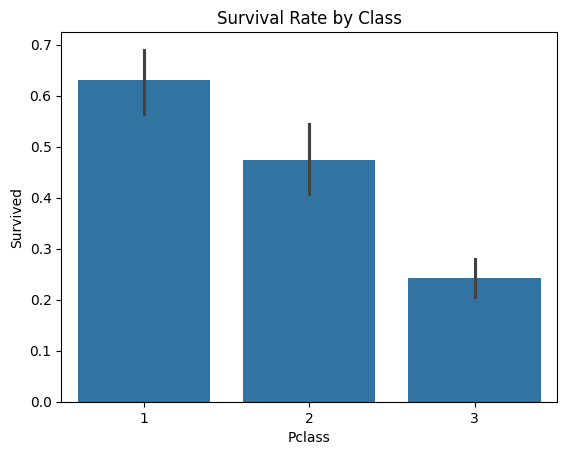

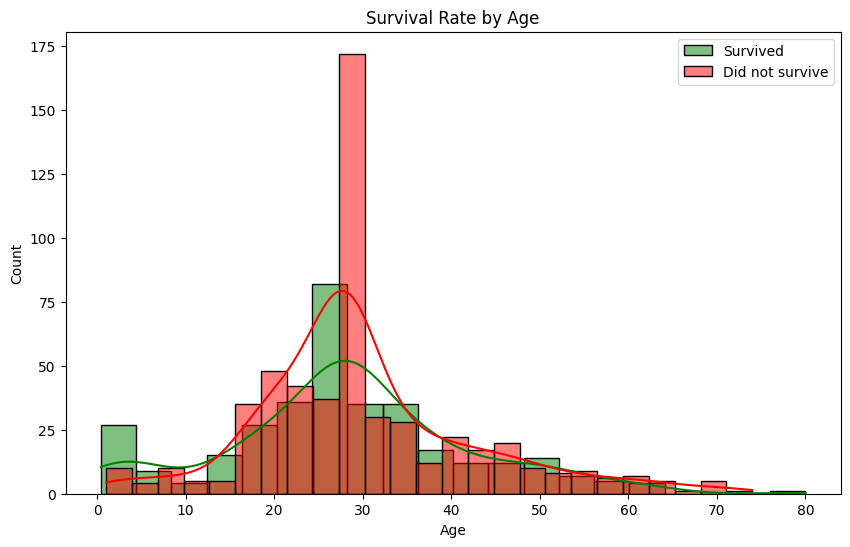

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival rate by gender
sns.barplot(x='Sex_male', y='Survived', data=train_data)
plt.title("Survival Rate by Gender")
plt.show()

# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title("Survival Rate by Class")
plt.show()

# Survival rate by Age
plt.figure(figsize=(10, 6))
sns.histplot(train_data[train_data['Survived'] == 1]['Age'], color="green", label="Survived", kde=True)
sns.histplot(train_data[train_data['Survived'] == 0]['Age'], color="red", label="Did not survive", kde=True)
plt.legend()
plt.title("Survival Rate by Age")
plt.show()


**4. Modeling**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Select features and target
features = ['Pclass', 'Age', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = train_data[features]
y = train_data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
